In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# 키(cm), 몸무게(kg) → BMI 계산
np.random.seed(42)
height = np.random.randint(150, 190, 500)   # 150 ~ 190cm
weight = np.random.randint(45, 100, 500)    # 45 ~ 100kg
bmi = weight / ((height / 100) ** 2)

In [3]:
age = np.random.randint(18, 60, 500)
exercise = np.random.randint(0, 10, 500)   # 주당 운동 시간

In [4]:
data = pd.DataFrame({
    "Height": height,
    "Weight": weight,
    "Age": age,
    "Exercise": exercise,
    "BMI": bmi
})

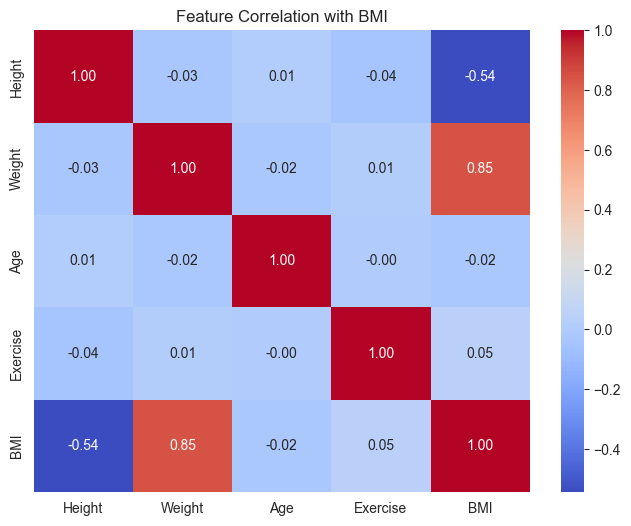

In [5]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with BMI")
plt.show()

In [6]:
X = data.drop("BMI", axis=1)
y = data["BMI"]

In [7]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# 데이터셋 분리
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [9]:
# 모델 정의
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),
    Dense(32, activation="relu"),
    Dense(1)
])

/Users/khyu2/miniconda3/envs/study/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-10-02 10:18:05.264729: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-10-02 10:18:05.264767: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-10-02 10:18:05.264772: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.66 GB
2025-10-02 10:18:05.264792: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-10-02 10:18:05.264805: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:

In [10]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [11]:
# 학습
history = model.fit(X_train, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=16,
                    verbose=1)

Epoch 1/50


2025-10-02 10:18:21.415862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 671.2468 - mae: 25.0738 - val_loss: 658.5366 - val_mae: 24.7993
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 655.2676 - mae: 24.8072 - val_loss: 634.9824 - val_mae: 24.4169
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 590.6166 - mae: 23.5696 - val_loss: 610.9352 - val_mae: 24.0248
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 584.7845 - mae: 23.5603 - val_loss: 580.7572 - val_mae: 23.5354
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 550.1302 - mae: 23.0006 - val_loss: 542.3468 - val_mae: 22.8606
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 521.1364 - mae: 22.4859 - val_loss: 491.9379 - val_mae: 21.8854
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 455.7555 - mae: 21.0963 - val_loss: 433.5889 - val_mae: 20.5793
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 407.2803 - mae: 19.8895 - val_loss: 366.7850 - val_mae: 18.8105
Epoch 9/50
20/20 ━━━━━━━━━━

In [12]:
# 평가
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"테스트 MAE: {mae:.4f}")

테스트 MAE: 0.6400


In [13]:
# 예측
sample = np.array([[170, 70, 25, 3]])   # 키170, 몸무게70, 나이25, 운동3시간
sample_scaled = scaler.transform(sample)
pred_bmi = model.predict(sample_scaled)
print(f"예측된 BMI: {pred_bmi[0][0]:.2f}")

/Users/khyu2/miniconda3/envs/study/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
예측된 BMI: 24.46
